# UCK 358E – Introduction to Artificial Intelligence 
## Homework 2
## Deadline: May 12, 2024




#### Name: Yasin Akdemir
#### Student Number: 110210072

### In this homework, you will focus on predicting type of trees in a forest. There are 7 different tree types in the dataset, the label is named as "Cover_Type" and you will train models to predict the correct type for the test data. Each section below contains clear explanations about the tasks. It is not required to write a separate report for the homework. Make all of your explanations and discussions inside the Jupiter Notebook. Use the Notebook as your report. Be aware that If you deliver a Notebook containing only codes without explanation and discussion, you will lose majority of your points. 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## import any library that you will use


# Load Data (don't change anything in this part, just run it) 

In [11]:
df = pd.read_csv("datasetHW.csv")
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [12]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [13]:
df_new = df[["Elevation", "Hillshade_9am", "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points", "Cover_Type"]]
X = df_new.drop(["Cover_Type" ], axis=1)
y = df_new[["Cover_Type"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # don't change random state

In [14]:
X_train

,Elevation,Hillshade_9am,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
765,2916,202,67,1507
5927,2356,247,210,1050
14032,2977,195,696,878
6187,2415,131,108,638
3872,2299,167,497,1159
...,...,...,...,...
5191,2189,254,0,525
13418,2317,229,0,560
5390,2962,237,95,470
860,2898,204,30,1552


In [15]:
y_train

,Cover_Type
765,2
5927,3
14032,2
6187,6
3872,3
...,...
5191,4
13418,4
5390,2
860,5


In [16]:
filter_col = [col for col in df if col.startswith('Soil_Type')]
filter_col.extend(["Elevation", "Hillshade_9am", "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points"])
df2 = df.loc[(df['Cover_Type'] == 1) | (df['Cover_Type'] == 3) ]
X2 = df2[filter_col]
y2 = df2[["Cover_Type"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42) # don't change random state

In [17]:
X_train2

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Elevation,Hillshade_9am,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
2701,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2047,89,228,42
2056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3341,184,424,1809
7093,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2651,217,470,1124
5778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3114,180,474,3206
10341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3164,226,150,1262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12092,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2081,244,175,488
1799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3241,217,0,2012
11119,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2510,228,319,180
13509,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2401,146,210,569


In [18]:
y_train2

,Cover_Type
2701,3
2056,1
7093,3
5778,1
10341,1
...,...
12092,3
1799,1
11119,3
13509,3


## <font color='red'>  In part a and part b, use (X_train, y_train) for training and (X_test, y_test) for testing your model. Don't use (X_test, y_test) during training or validation. </font>

## <font color='red'> In part c, use (X_train2) for training and (X_test2, y_test2) for testing your model. X_train2 contains both continues and categorical features. </font>

## Part a) Train SVM model with the first training set (X_train). Try to figure out whether there is overfitting or underfitting. Define the required preprocesses and feature engineering approaches to obtain the best accuracy for the test set (X_test). Plot confusion matrix, present your results and discuss your findings. (You are free to use sklearn in this part) 

### <font color='yellow'> *Answer:*</font> <font color='white'> In this part I will use sklearn SVC. I will adjust the regularization parameter (C) as 2 to prevent overfit, and gamma to default which is scale. Later in this part I will add feature processing and validation, confusion matrix.</font>

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_classifier = SVC(C=2.0, gamma='scale') # Support Vector Classifier from sklearn with C value of 2 and no pre-processing on data. ALso default kernel is Radial basis kernel.

svm_classifier.fit(X_train, y_train) # Training our SVM model


y_pred = svm_classifier.predict(X_test) # Make predictions with trained model with test data


accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy score with sklearn
print("Accuracy Score:", accuracy) # Accuracy Score: 0.6415343915343915




C:\Users\yasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 0.6415343915343915


### <font color='yellow'> *Checking underfit or overfit:*</font> <font color='white'> In this part I will use Cross-Validation to check if model has overfit. The Cross-Validation scores are really close to each other (Standard Deviation of Accuracy Scores in Cross-Validation: 0.01) so we can say there is no overfitting. On the underfittting side we can say model has a respectively good score of 0.64 accuracy score which we can say there is no significance underfit. </font>

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


svm_classifier = SVC(C=2.0, gamma='scale') # Create an SVM classifier with same C value.


cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5) # Here I am using 5 split cross-validation


print("All Cross-Validation Scores:", cv_scores) # Print all cross-validation scores


mean_accuracy = cv_scores.mean() # Mean of accuracies
std_accuracy = cv_scores.std() # Standart deviation of accuracies
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

C:\Users\yasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

All Cross-Validation Scores: [0.64430798 0.65422768 0.62966462 0.62919225 0.62807183]
Mean Accuracy: 0.6370928740513603
Standard Deviation of Accuracy: 0.010436832252038102


### <font color='yellow'> *Improving the model performance:*</font> <font color='white'> In this part I will use standart scaling from sklearn which Standardizes features by removing the mean and scaling to unit variance. Our accuracy becomes 0.69 which is better. </font>

C:\Users\yasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

All Cross-Validation Scores: [0.68493151 0.69296174 0.67926311 0.68445914 0.67816635]


C:\Users\yasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 0.6915784832451499


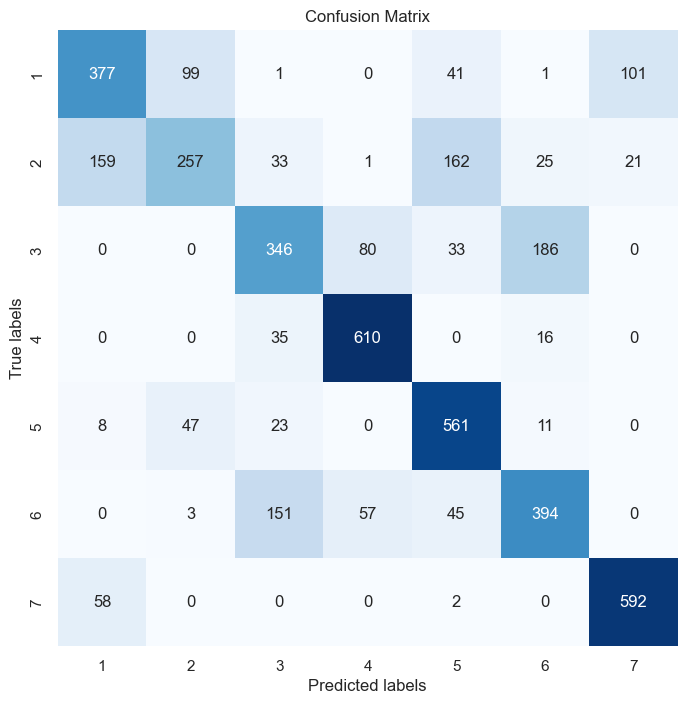

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

svm_pipeline = make_pipeline(StandardScaler(), SVC(C=2.0, gamma='scale')) # Create a pipeline with scaling and SVC with same hyperparameters


cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=5) # Same 5 split cross-validation to check is model overfitted this time


print("All Cross-Validation Scores:", cv_scores) # Print all cross-validation scores


svm_pipeline.fit(X_train, y_train) # Training our SVM model with whole X_train for confusion matrix


y_pred = svm_pipeline.predict(X_test) # Make predictions with trained model with test data for confusion matrix


accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy score with sklearn

print("Accuracy Score:", accuracy) # Accuracy Score:  0.6915784832451499
classes = np.unique(y_train)


conf_matrix = confusion_matrix(y_test, y_pred, labels=classes) # confusion matrix with sklearn


plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Part b) Train NN models with the first training set (X_train). You will train NN models with different architectures. 

### b1) Train a NN model with a small network and train another one using a bigger network that contains at least 3 hidden layers. Try to figure out whether there is overfitting or underfitting. Define the required preprocesses and feature engineering approaches to obtain the best accuracy with the second model for the test set (X_test). Plot confusion matrix, present your results and discuss your findings. (You are free to use keras in part b1, don't use sklearn for NN training) 


### <font color='yellow'> *Answer:*</font> <font color='white'> In this part I will use Keras for neural learning. First I will try to predict the cover type using neural network for regression task (regression values rounded for prediction) but later on I will use neural network for classification tasks using sigmoid function on output layer and get a better result in accuracy. </font>

### <font color='yellow'> *First models(regression approach):*</font> <font color='white'> In this part I will create 2 different neural networks, small network will have 2 hidden layers and large model will have 4 hidden layers. Both networks will have linear function at output layer for regression task, after regression I will round values for cover types. For better performance I will scale the features with sklearn standart scaler which standardizes features by removing the mean and scaling to unit variance. Then I will use cross-validation for checking the cost values every iteration.</font>

Epoch 1/50


C:\Users\yasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15.7553 - val_loss: 7.1691
Epoch 2/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 5.5505 - val_loss: 3.9338
Epoch 3/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 3.7392 - val_loss: 3.8248
Epoch 4/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 3.6452 - val_loss: 3.7653
Epoch 5/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 3.5441 - val_loss: 3.7148
Epoch 6/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 3.4753 - val_loss: 3.6599
Epoch 7/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 3.5369 - val_loss: 3.5850
Epoch 8/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 3.3278 - val_loss: 3.4875
Epoch 9/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 3.2659 - val_loss: 3.3927
Epoch 10/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 3.0951 - val_loss: 3.2806
Epoch 11/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 3.0709 - val_loss: 3.2082
Epoch 12/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0

C:\Users\yasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.8618 - val_loss: 3.9189
Epoch 2/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.6842 - val_loss: 3.7300
Epoch 3/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 3.4882 - val_loss: 3.5842
Epoch 4/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 3.3897 - val_loss: 3.3738
Epoch 5/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1347 - val_loss: 3.2034
Epoch 6/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9952 - val_loss: 3.0589
Epoch 7/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8349 - val_loss: 2.9651
Epoch 8/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7480 - val_loss: 2.8252
Epoch 9/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5646 - val_loss: 2.7732
Epoch 10/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5575 - val_loss: 2.7087
Epoch 11/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4255 - val_loss: 2.7153
Epoch 12/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

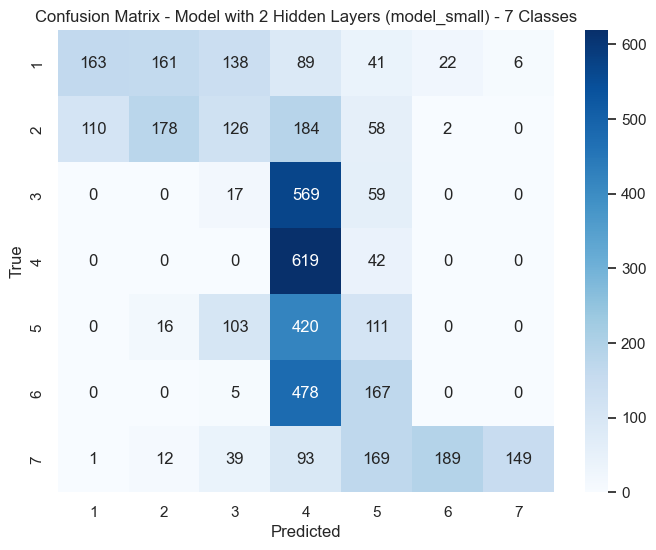

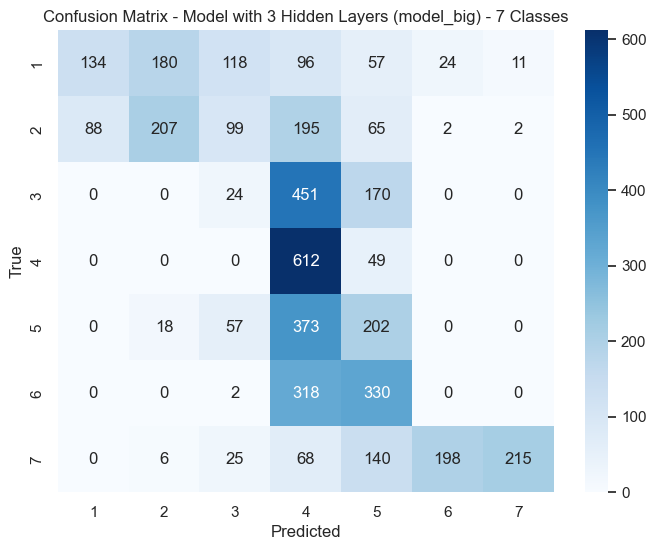

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler 



standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train) # Scaling data with sklearn
X_test_scaled = standard_scaler.transform(X_test)


model_small = Sequential([ # Model creation - Small Network: 2 hidden layers(8,4) and 1 output neuron
    Dense(8, activation='relu', input_shape=(X_train_scaled.shape[1],)), # I select relu here for giving model a non linear side also faster than sigmoid
    Dense(4, activation='relu'),
    Dense(1)  # Linear activation function which is for regression
])


model_small.compile(optimizer='adam', loss='mean_squared_error')  # Model compilation, mean squared error is for regression


history_small = model_small.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1) # I will create history for checking validation cost values to understand overfit


model_large = Sequential([ # Model creation - Large Network: 4 hidden layers(16,8,4,2) and 1 output neuron
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)), # I select relu here for giving model a non linear side also faster than sigmoid
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(2, activation='relu'),
    Dense(1)   # Linear activation function which is for regression
])


model_large.compile(optimizer='adam', loss='mean_squared_error')  # Model compilation, mean squared error is for regression


history_large = model_large.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1) # I will create history for checking validation cost values to understand overfit


y_pred_small = np.round(model_small.predict(X_test_scaled)).astype(int) # Making predictions for the small network, I will round the output value for prediction
y_pred_small = np.where(y_pred_small == 0, 1, y_pred_small) # Some values are calculated as 0 I will make them 1
y_pred_small = np.where(y_pred_small > 7, 7, y_pred_small) # Also I limit the values to 7, so I will eliminate nonsense data


y_pred_large = np.round(model_large.predict(X_test_scaled)).astype(int) # Making predictions for the large network
y_pred_large = np.where(y_pred_large == 0, 1, y_pred_large) # Some values are calculated as 0 I will make them 1
y_pred_large = np.where(y_pred_large > 7, 7, y_pred_large) # Also I limit the values to 7, so I will eliminate nonsense data


accuracy_small = accuracy_score(y_test, y_pred_small) # Calculating accuracies for both models
accuracy_large = accuracy_score(y_test, y_pred_large)

print("Small Network Test Accuracy:", accuracy_small)
print("Large Network Test Accuracy:", accuracy_large)


cm_small = confusion_matrix(y_test, y_pred_small) # Confusion matrix for the small network


cm_large = confusion_matrix(y_test, y_pred_large) # Confusion matrix for the large network
num_classes = 7 #cover types
# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_small, annot=True, cmap='Blues', fmt='g', xticklabels=np.arange(1, num_classes + 1), yticklabels=np.arange(1, num_classes + 1))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - Model with 2 Hidden Layers (model_small) - {num_classes} Classes')
plt.show()

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_large, annot=True, cmap='Blues', fmt='g', xticklabels=np.arange(1, num_classes + 1), yticklabels=np.arange(1, num_classes + 1))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - Model with 3 Hidden Layers (model_big) - {num_classes} Classes')
plt.show()


### <font color='yellow'> *Discuss Findings for first models:*</font> <font color='white'> The small network has accuracy of 0.27 and large model has accuracy of 0.30 (some of the runs the algortihm gives worse scores). We can also look at the confusion table and say we have underfit with poor model performance. We dont have overfit and we can say it by looking the printed history of keras compiler which we have close values of cost and val_cost.</font>

### <font color='yellow'> *Second models(Sigmoid approach):*</font> <font color='white'> After getting bad accuracy in first approach, I will now use sigmoid function for output layer, I will use standart scaler for better performance.</font>

Epoch 1/50


C:\Users\yasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.1181 - loss: 0.6173
Epoch 2/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.1971 - loss: 0.4085
Epoch 3/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.2991 - loss: 0.3668
Epoch 4/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.3670 - loss: 0.3255
Epoch 5/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.4862 - loss: 0.2989
Epoch 6/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.5587 - loss: 0.2750
Epoch 7/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.5895 - loss: 0.2556
Epoch 8/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.5909 - loss: 0.2459
Epoch 9/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.6024 - loss: 0.2396
Epoch 10/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.6009 - loss: 0.2349
Epoch 11/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.5987 - loss: 0.2343
Epoch 12/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 

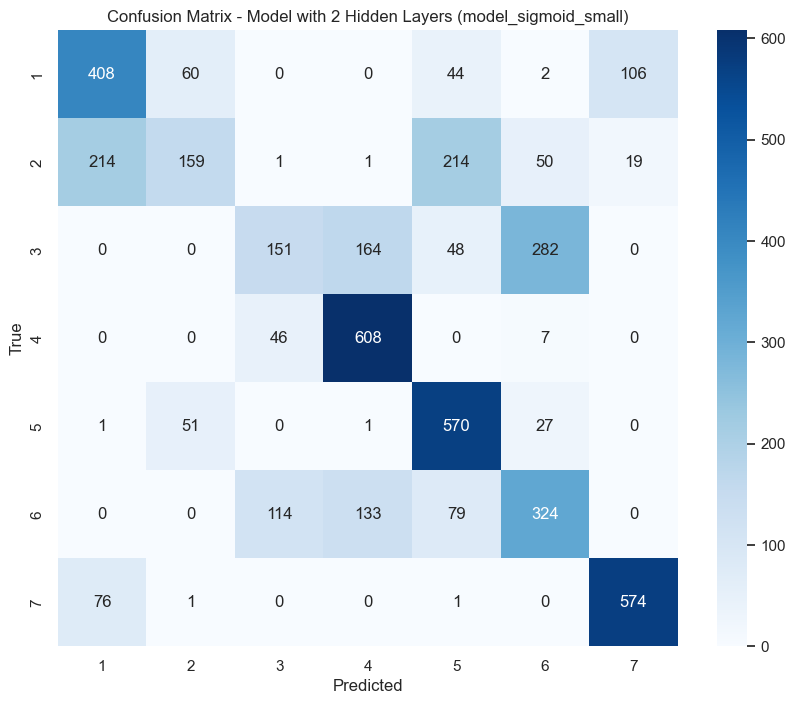

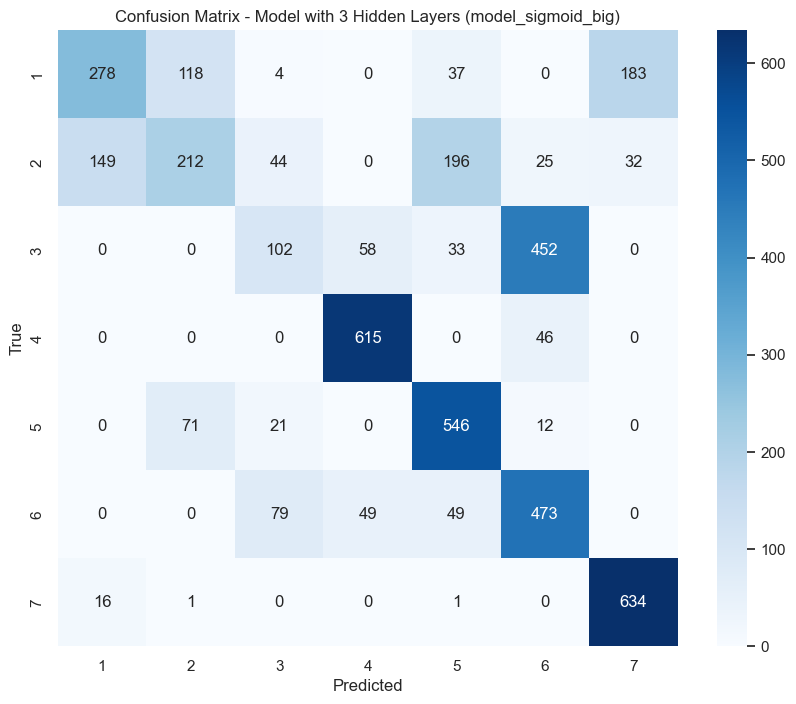

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

num_classes = 7
binary_classes = []
for i in range(1, num_classes + 1):
    binary_classes.append(np.where(y_train == i, 1, 0)) # Creating binary classes from our data, This for loop selects the cover types and parses them to new binary classes


binary_classes_combined = np.array(binary_classes).T
binary_classes_combined = binary_classes_combined.squeeze() # Combine binary classes into a single array

#print(y_train)
#print(binary_classes_combined)


standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)  # Scaling input data with sklearn standart scaling


model_sigmoid_small = Sequential([ # Model creation - Small Network: 2 hidden layers(8,4) and 1 output neuron
    Dense(8, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(4, activation='relu'),
    Dense(num_classes, activation='sigmoid') # Output is sigmoid function
])


model_sigmoid_small.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Model compilation, binary loss function for sigmoid, this time we can use accuracy metrics since we are using binary classes


history_sigmoid_small = model_sigmoid_small.fit(X_train_scaled, binary_classes_combined, epochs=50, batch_size=32) # History to discuss later


model_sigmoid_big = Sequential([ # Model creation - Small Network: 4 hidden layers(16,8,4,2) and 1 output neuron
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(2, activation='relu'), 
    Dense(num_classes, activation='sigmoid') # Output is sigmoid function
])


model_sigmoid_big.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])# Model compilation, binary loss function for sigmoid, this time we can use accuracy metrics since we are using binary classes


history_sigmoid_big = model_sigmoid_big.fit(X_train_scaled, binary_classes_combined, epochs=50, batch_size=32) # History to discuss later


X_test_scaled = standard_scaler.transform(X_test) # Scaling test data


predictions_sigmoid_small = model_sigmoid_small.predict(X_test_scaled) # Making predictions for model with 2 hidden layers


predictions_sigmoid_big = model_sigmoid_big.predict(X_test_scaled) # Making predictions for model with 4 hidden layers


loss_sigmoid_small, accuracy_sigmoid_small = model_sigmoid_small.evaluate(X_train_scaled, binary_classes_combined) # Evaluating  models
loss_sigmoid_big, accuracy_sigmoid_big = model_sigmoid_big.evaluate(X_train_scaled, binary_classes_combined)

print("Model with 2 hidden layers (model_sigmoid_small) Loss:",loss_sigmoid_small,"Accuracy:",accuracy_sigmoid_small)


print("Model with 3 hidden layers (model_sigmoid_big) Loss:",loss_sigmoid_big, "Accuracy",accuracy_sigmoid_big)



y_pred_sigmoid_small = np.argmax(predictions_sigmoid_small, axis=1) + 1 # This +1 comes from index adjusting from 0-6 to 1-7 for confusion matrix
conf_matrix_sigmoid_small = confusion_matrix(y_test, y_pred_sigmoid_small)  # Calculate confusion matrix for model with 2 hidden layers


y_pred_sigmoid_big = np.argmax(predictions_sigmoid_big, axis=1) + 1 # This +1 comes from index adjusting from 0-6 to 1-7  for confusion matrix
conf_matrix_sigmoid_big = confusion_matrix(y_test, y_pred_sigmoid_big)   # Calculate confusion matrix for model with 4 hidden layers

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_sigmoid_small, annot=True, cmap='Blues', fmt='g', xticklabels=np.arange(1, num_classes + 1), yticklabels=np.arange(1, num_classes + 1))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Model with 2 Hidden Layers (model_sigmoid_small)')
plt.show()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_sigmoid_big, annot=True, cmap='Blues', fmt='g', xticklabels=np.arange(1, num_classes + 1), yticklabels=np.arange(1, num_classes + 1))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Model with 3 Hidden Layers (model_sigmoid_big)')
plt.show()

### <font color='yellow'> *Discuss Findings for second models:*</font> <font color='white'> The small network has accuracy of 0.620 and large model has accuracy of 0.629 (some of the runs the algortihm gives a little bit lower scores). We can also look at the confusion table and say we have a good score, sigmoid function really improved the performance. We dont have underfit as we get good predictions. Also from history log we can see we have about 0.64 accuracy with train data, which indicates we dont have a huge gap between train and test scores so we dont have overfit.

### b2) Use the second architecture (which contains at least 3 hidden layers) and the preprocess that you defined in part b1, and train this neural network by developing your NN training algorithm from scratch without using any library. Compare your results with b1. (You can benefit from the codes available in ninova)


### <font color='yellow'> *Answer:*</font> <font color='white'> In this part I will use my big neural network architecture which contains 4 hidden layers and write it from scratch with benefiting from codes in Ninova. To have the same architecture with the keras one, I modified the code in Ninova. The modifications I have done are: I added standart scaler from scratch, added ReLu function and it's derivative for hidden layers, adjusted cost and prediction functions for new layers. Discussion part is at the bottom of code.</font>

Cost: 4.893023516625683
Cost: 3.6758738136048446
Cost: 0.9783633633235257
Cost: 0.8658037527549047
Cost: 0.5266462280107658
Cost: 0.06752848130743709
Cost: 0.06688633390625642
Cost: 0.06437795335580326
Cost: 0.05524694891873786
Cost: 0.029939599944758595
Cost: 0.0025688229052606335
Cost: 0.002567880638168833
Cost: 0.0025641150245632903
Cost: 0.002549107704622876
Cost: 0.002489951580605142
Cost: 0.0022667393652263538
Cost: 0.001556834419055672
Cost: 0.00034643009047443735
Cost: 0.000346412945218454
Cost: 0.00034634437267968524
Cost: 0.00034607021824704134
Cost: 0.0003449757690730589
Cost: 0.0003406324776539125
Cost: 0.00032379933579372924
Cost: 0.000264384757024409
Cost: 0.00011751494671530472
Cost: 0.00011751297394066089
Cost: 0.00011750508317249906
Cost: 0.00011747352539768088
Cost: 0.00011734737902914272
Cost: 0.00011684414668572992
Cost: 0.0001148527054122513
Cost: 0.0001072206149584859
Cost: 8.143787186478752e-05
Cost: 2.7103014869518897e-05
Test Set Accuracy: 0.1421957671957672


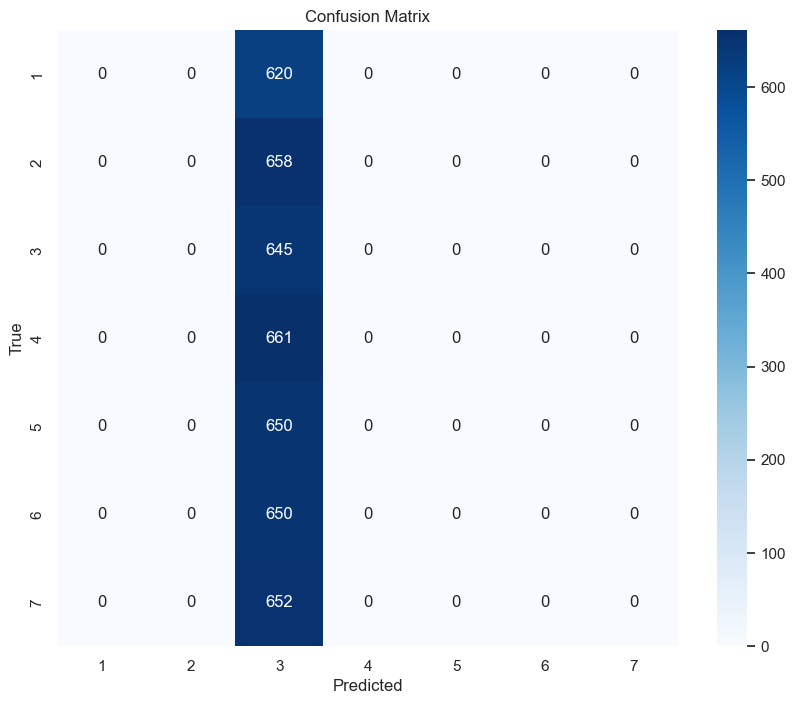

In [39]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.io import loadmat


def standardize_features(X): # This function is for scaling data. The formula is from sklearn website about StandartScaler
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    X_standardized = (X - mean) / std_dev
    return X_standardized

X_train_scaled = standardize_features(X_train) # Scaling the training data
#print(X_train_scaled)
X_test_scaled = standardize_features(X_test) # Scaling the test data


input_layer_size = 4  # There are 4 features in the input data


num_labels = 7  # There are 7 cover type for prediction

hidden_layer_size1 = 16 # Defining layer sizes, same as part b1 big model
hidden_layer_size2 = 8
hidden_layer_size3 = 4
hidden_layer_size4 = 2

Theta1 = np.zeros((hidden_layer_size1, input_layer_size + 1))  # These arrays are for weights ,+1 for bias terms
Theta2 = np.zeros((hidden_layer_size2, hidden_layer_size1 + 1))
Theta3 = np.zeros((hidden_layer_size3, hidden_layer_size2 + 1))
Theta4 = np.zeros((hidden_layer_size4, hidden_layer_size3 + 1))

def relu(z): # ReLu function for hidden layers
    return np.maximum(0, z)

def reluGradient(z): # Derivative of ReLu
    return np.where(z > 0, 1, 0)

def sigmoid(z): # Sigmoid for output layer
    return 1 / (1 + np.exp(-z))

def sigmoidGradient(z): # Derivative of sigmoid
    return np.multiply(sigmoid(z), 1 - sigmoid(z))

def randInitializeWeights(L_in, L_out): # This function is for random initializing weights
    epsilon_init = 0.12
    rng = np.random.RandomState(42)
    W = rng.rand(L_out, L_in + 1) * epsilon_init * 2 - epsilon_init
    return W

def nnCostFunction(nn_params, input_layer_size, hidden_layer_size1, hidden_layer_size2, hidden_layer_size3,
                   hidden_layer_size4, num_labels, X, y, lam): # This function is calculating cost function

    Theta1_last_term = hidden_layer_size1 * (input_layer_size + 1)# Theta1_last_term means the last term of Theta1 is at index 80 (16*5), it is calculated by hidden_layer_size *input_layer_size 
    Theta1 = nn_params[:Theta1_last_term].reshape((hidden_layer_size1, input_layer_size + 1)) # Getting thetha values from nn_param to Thetha1 variable with right indexing
    #print("theta1 shape:",Theta1.shape) #16x5
    Theta2_last_term = Theta1_last_term + hidden_layer_size2 * (hidden_layer_size1 + 1) # Calculating new last term index
    Theta2 = nn_params[Theta1_last_term:Theta2_last_term].reshape((hidden_layer_size2, hidden_layer_size1 + 1)) # Same process at all thethas explained above.
    #print("theta2 shape:",Theta2.shape) #8x17
    Theta3_last_term = Theta2_last_term + hidden_layer_size3 * (hidden_layer_size2 + 1)
    Theta3 = nn_params[Theta2_last_term:Theta3_last_term].reshape((hidden_layer_size3, hidden_layer_size2 + 1))
    
    Theta4_last_term = Theta3_last_term + hidden_layer_size4 * (hidden_layer_size3 + 1)
    Theta4 = nn_params[Theta3_last_term:Theta4_last_term].reshape((hidden_layer_size4, hidden_layer_size3 + 1))
    
    Theta5 = nn_params[Theta4_last_term:].reshape((num_labels, hidden_layer_size4 + 1))
    
    m = X.shape[0] # I will use m for dimensions of given X
    
    
    X = np.hstack((np.ones((m, 1)), X)) # Add bias unit to input data
    A1 = X # input layer
    
    
    Z2 = np.dot(A1, Theta1.T) # First hidden layer
    A2 = relu(Z2)
    A2 = np.hstack((np.ones((m, 1)), A2)) # Adding bias for next layer
    
    Z3 = np.dot(A2, Theta2.T) # Second hidden layer
    A3 = relu(Z3)
    A3 = np.hstack((np.ones((m, 1)), A3))  # Adding bias for next layer
    
    Z4 = np.dot(A3, Theta3.T) # Third hidden layer
    A4 = relu(Z4)
    A4 = np.hstack((np.ones((m, 1)), A4))  # Adding bias for next layer
    
    Z5 = np.dot(A4, Theta4.T) # Fourth hidden layer
    A5 = relu(Z5)
    A5 = np.hstack((np.ones((m, 1)), A5))  # Adding bias for next layer
    
    Z6 = np.dot(A5, Theta5.T) # Output layer
    A6 = sigmoid(Z6)
    
    
    y_train = np.zeros((m, num_labels)) # Converting labels
    y_train[np.arange(m), y - 1] = 1
    
    
    J = -np.sum(np.multiply(y_train, np.log(A6)) + np.multiply(1 - y_train, np.log(1 - A6))) / m # Cost function
    print("Cost:", J)
    
    reg = (np.sum(np.square(Theta1[:, 1:])) + np.sum(np.square(Theta2[:, 1:])) + # Regularization term but I didnt used any regularizaton in b1 so I will set lam = 0
           np.sum(np.square(Theta3[:, 1:])) + np.sum(np.square(Theta4[:, 1:])) +
           np.sum(np.square(Theta5[:, 1:]))) * (lam / (2 * m))
    J += reg
    

    delta6 = A6 - y_train
    delta5 = np.dot(delta6, Theta5)[:, 1:] * reluGradient(Z5) # Backpropagation
    delta4 = np.dot(delta5, Theta4)[:, 1:] * reluGradient(Z4)
    delta3 = np.dot(delta4, Theta3)[:, 1:] * reluGradient(Z3)
    delta2 = np.dot(delta3, Theta2)[:, 1:] * reluGradient(Z2)
    
    Theta1_grad = np.dot(delta2.T, A1) / m
    Theta2_grad = np.dot(delta3.T, A2) / m
    Theta3_grad = np.dot(delta4.T, A3) / m
    Theta4_grad = np.dot(delta5.T, A4) / m
    Theta5_grad = np.dot(delta6.T, A5) / m
    
    
    Theta1_grad[:, 1:] += (lam / m) * Theta1[:, 1:] # Regularization of gradients, but I am not using this as I set lam = 0, n order to have same architecture with b1
    Theta2_grad[:, 1:] += (lam / m) * Theta2[:, 1:]
    Theta3_grad[:, 1:] += (lam / m) * Theta3[:, 1:]
    Theta4_grad[:, 1:] += (lam / m) * Theta4[:, 1:]
    Theta5_grad[:, 1:] += (lam / m) * Theta5[:, 1:]
    
    grad = np.concatenate((Theta1_grad.ravel(), Theta2_grad.ravel(), Theta3_grad.ravel(),
                           Theta4_grad.ravel(), Theta5_grad.ravel()))
    
    return J, grad


initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size1) # Setting first weights with randInitializeWeights function
initial_Theta2 = randInitializeWeights(hidden_layer_size1, hidden_layer_size2)
initial_Theta3 = randInitializeWeights(hidden_layer_size2, hidden_layer_size3)
initial_Theta4 = randInitializeWeights(hidden_layer_size3, hidden_layer_size4)
initial_Theta5 = randInitializeWeights(hidden_layer_size4, num_labels)

nn_params = np.hstack((initial_Theta1.ravel(), initial_Theta2.ravel(), initial_Theta3.ravel(), # Stackind all weights in one array
                       initial_Theta4.ravel(), initial_Theta5.ravel()))

lam = 0 # I will set lam to 0. This will make model with no regularization just like the model in b1




res = optimize.minimize(fun=nnCostFunction, x0=nn_params,
                        args=(input_layer_size, hidden_layer_size1, hidden_layer_size2,
                              hidden_layer_size3, hidden_layer_size4, num_labels, X_train_scaled, y_train, lam),
                        method='CG', jac=True, options={"maxiter": 50}) # Optimize the neural network using conjugate gradient method


Theta1_last_term = hidden_layer_size1 * (input_layer_size + 1) # Same approach for indexing at cost function
Theta1_optimized = res.x[:Theta1_last_term].reshape((hidden_layer_size1, input_layer_size + 1)) # Get the new Thetha from optimizer

Theta2_last_term = Theta1_last_term + hidden_layer_size2 * (hidden_layer_size1 + 1) # Same with all thethas
Theta2_optimized = res.x[Theta1_last_term:Theta2_last_term].reshape((hidden_layer_size2, hidden_layer_size1 + 1))

Theta3_last_term = Theta2_last_term + hidden_layer_size3 * (hidden_layer_size2 + 1)
Theta3_optimized = res.x[Theta2_last_term:Theta3_last_term].reshape((hidden_layer_size3, hidden_layer_size2 + 1))

Theta4_last_term = Theta3_last_term + hidden_layer_size4 * (hidden_layer_size3 + 1)
Theta4_optimized = res.x[Theta3_last_term:Theta4_last_term].reshape((hidden_layer_size4, hidden_layer_size3 + 1))

Theta5_optimized = res.x[Theta4_last_term:].reshape((num_labels, hidden_layer_size4 + 1))


def predict(Theta1, Theta2, Theta3, Theta4, Theta5, X): # Prediction function

    m = X.shape[0] # Dimensions of X
    
    X = np.hstack((np.ones((m, 1)), X)) # Input layer takes all X data
    
    A2 = relu(np.dot(X, Theta1.T)) # First hidden layer
    A2 = np.hstack((np.ones((m, 1)), A2)) # Adding 1 values for biases
    
    A3 = relu(np.dot(A2, Theta2.T)) # Second hidden layer
    A3 = np.hstack((np.ones((m, 1)), A3)) # Adding 1 values for biases
    
    A4 = relu(np.dot(A3, Theta3.T)) # Third hidden layer
    A4 = np.hstack((np.ones((m, 1)), A4)) # Adding 1 values for biases
    
    A5 = relu(np.dot(A4, Theta4.T))  # Fourth hidden layer
    A5 = np.hstack((np.ones((m, 1)), A5)) # Adding 1 values for biases
    
    A6 = sigmoid(np.dot(A5, Theta5.T)) # Last layer, sigmoid function
    
    pred = np.argmax(A6, axis=1) + 1 # predictions are the highest sigmoid outputs, +1 is for adjusting index from 0-6 to 1-7
    return pred


predictions = predict(Theta1_optimized, Theta2_optimized, Theta3_optimized, Theta4_optimized, Theta5_optimized, X_test_scaled) # Evaluate the accuracy of the model with test data set
accuracy = np.mean(predictions == y_test.values.ravel())
print("Test Set Accuracy:" ,accuracy)


conf_matrix = confusion_matrix(y_test, predictions)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.arange(1, num_labels + 1), yticklabels=np.arange(1, num_labels + 1))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### <font color='yellow'> *Discuss findings:*</font> <font color='white'> The model I wrote from scratch, did bad predictions and scored only 0.14 with predicting same cover type for every iteration. Although cost function is getting smaller every iteration the predictions are bad, the model has a problem elsewhere. This looks like a problem in code or underfit situation.</font>

## Part c) This time, you have a different dataset with continues and categorical features (X_train2) to train unsupervised learning models. You need to train autoencoder and K-means, EM models. 

### c1) Train an autoencoder with 2 neurons in the latent space and more that 2 layers in the encoder/decoder, train another autoencoder with same architecture except there is 3 neurons in the latent space. Evaluate the performance of your models, and try to improve it. (You are free to use keras in part c1, don't use sklearn for NN training.) 


### <font color='yellow'> *Answer:*</font> <font color='white'> In this part I will use keras for creating the neural network. I created 2 different models, one with 2 neurons in latent space and one with 3 neurons in latent space. To improve the performance I scaled data using standart scaler, later I changed it to minmax scaler which performed better. The models has encoding and decoding parts, input data and output data is same so we can just look at mean squared error of predictions to tell if our model is good enough. After running the code below we get MSE for 2 neuron latent model: 0.01 and MSE for 3 neuron in latent model: 0.007 values which tells we can encode and decode with this model without losing too much information (in some runs MSE values change a bit).</font>

In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import MinMaxScaler


def create_autoencoder_2(input_dim): # Create the autoencoder with 2 neurons in the latent space
    input_layer = Input(shape=(input_dim,))
    encoded_1 = Dense(16, activation='relu')(input_layer)
    encoded_2 = Dense(8, activation='relu')(encoded_1)
    
    encoded_3 = Dense(2, activation='relu')(encoded_2) # This layer contains 2 neuron, I will use this layer's output as encoded data later
    
    decoded_4 = Dense(8, activation='relu')(encoded_3)
    decoded_5 = Dense(16, activation='relu')(decoded_4)
    decoded = Dense(input_dim, activation='sigmoid')(decoded_5)
    
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse') # I choose mse loss th,s time since I will use MSE as performance criteria
    return autoencoder


def create_autoencoder_3(input_dim): # Create the autoencoder with 3 neurons in the latent space
    input_layer = Input(shape=(input_dim,))
    encoded_1 = Dense(16, activation='relu')(input_layer)
    encoded_2 = Dense(8, activation='relu')(encoded_1)

    encoded_3 = Dense(3, activation='relu')(encoded_2) # This layer contains 3 neuron, I will use this layer's output as encoded data later
    
    decoded_4 = Dense(8, activation='relu')(encoded_3)
    decoded_5 = Dense(16, activation='relu')(decoded_4)
    decoded = Dense(input_dim, activation='sigmoid')(decoded_5)
    
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder


min_max_scaler = MinMaxScaler() # This time I am using MinMax scaler, I tested some of scalers and this performed best
X_train2_scaled = min_max_scaler.fit_transform(X_train2)


autoencoder_2 = create_autoencoder_2(X_train2_scaled.shape[1]) # Create and train the autoencoder with 2 neurons in the latent space
history_2 = autoencoder_2.fit(X_train2_scaled, X_train2_scaled, epochs=50, batch_size=32, validation_split=0.1)


autoencoder_3 = create_autoencoder_3(X_train2_scaled.shape[1]) # Create and train the autoencoder with 3 neurons in the latent space
history_3 = autoencoder_3.fit(X_train2_scaled, X_train2_scaled, epochs=50, batch_size=32, validation_split=0.1)

X_test2_scaled = min_max_scaler.transform(X_test2) # Scaling test data


mse_2 = autoencoder_2.evaluate(X_test2_scaled, X_test2_scaled) # Get the performance of the autoencoder with 2 neurons in the latent space using MSE


mse_3 = autoencoder_3.evaluate(X_test2_scaled, X_test2_scaled) # Get the performance of the autoencoder with 3 neurons in the latent space using MSE

print("Autoencoder with 2 neurons in the latent space - MSE:", mse_2)
print("Autoencoder with 3 neurons in the latent space - MSE:", mse_3)


Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2213 - val_loss: 0.0925
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0569 - val_loss: 0.0258
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0253 - val_loss: 0.0250
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0246 - val_loss: 0.0247
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0244 - val_loss: 0.0246
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0244 - val_loss: 0.0245
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0241 - val_loss: 0.0244
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0242 - val_loss: 0.0244
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0242 - val_loss: 0.0243
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0240 - val_loss: 0.0242
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0240 - val_loss: 0.0242
Epoch 12/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0240 - val_lo

### c2) You will train separate models using the latent spaces in the first autoencoder and second autoencoder in part c1. Only use the neuron outputs in the latent space as your features, and implement K-means and EM algorithms to cluster the data. Evaluate the performance of trained clustering models by using test set labels in X_test2. Plot 2-dimensional and 3-dimensional figures for the latent layer outputs while assessing model performances, and extend your discussions based on these figures and true classes of the samples. In your figures, illustrate the true classes of the samples using different colours. (You are free to use sklearn in this part) 

### <font color='yellow'> *Answer:*</font> <font color='white'> In order to use encoded data from part c1 I will create 2 models given below. Also as seen in output the encoded data shapes are 1296,3 and 1296,2.</font>

In [55]:
# Get the encoded representation from the autoencoder with 2 neurons in the latent space
encoder_2 = Model(inputs=autoencoder_2.input, outputs=autoencoder_2.layers[3].output)
encoded_data_2 = encoder_2.predict(X_test2_scaled)

# Get the encoded representation from the autoencoder with 3 neurons in the latent space
encoder_3 = Model(inputs=autoencoder_3.input, outputs=autoencoder_3.layers[3].output)
encoded_data_3 = encoder_3.predict(X_test2_scaled)

print("Encoded data shape (2 neurons):", encoded_data_2.shape)
print("Encoded data shape (3 neurons):", encoded_data_3.shape)
print("Encoded data  (2 neurons):", encoded_data_2)
print("Encoded data  (3 neurons):", encoded_data_3)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Encoded data shape (2 neurons): (1296, 2)
Encoded data shape (3 neurons): (1296, 3)
Encoded data  (2 neurons): [[23.369715  11.987762 ]
 [24.393137   3.5892153]
 [22.768126  11.342214 ]
 ...
 [20.394339  12.153358 ]
 [20.233875  12.560819 ]
 [21.21557   12.540749 ]]
Encoded data  (3 neurons): [[ 9.928348  11.145149  12.385633 ]
 [11.647542  19.758621   7.5687203]
 [ 3.7345238  8.798935   5.3993673]
 ...
 [ 0.        12.8719225 31.125807 ]
 [ 2.7529063 13.275152  20.536135 ]
 [ 2.3735607 13.694669  20.929594 ]]


### <font color='yellow'> *Visualizing:*</font> <font color='white'> Since we have 2 and 3 dimensional data, we can visualise them easily. Just by looking to it we can see different groups in both figures.</font>

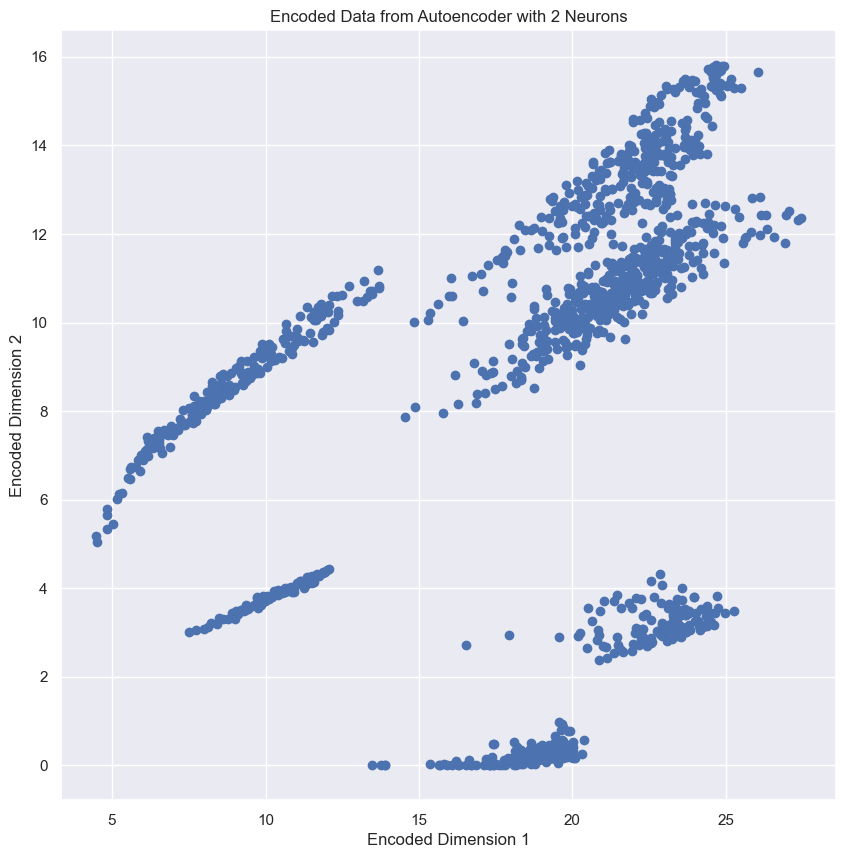

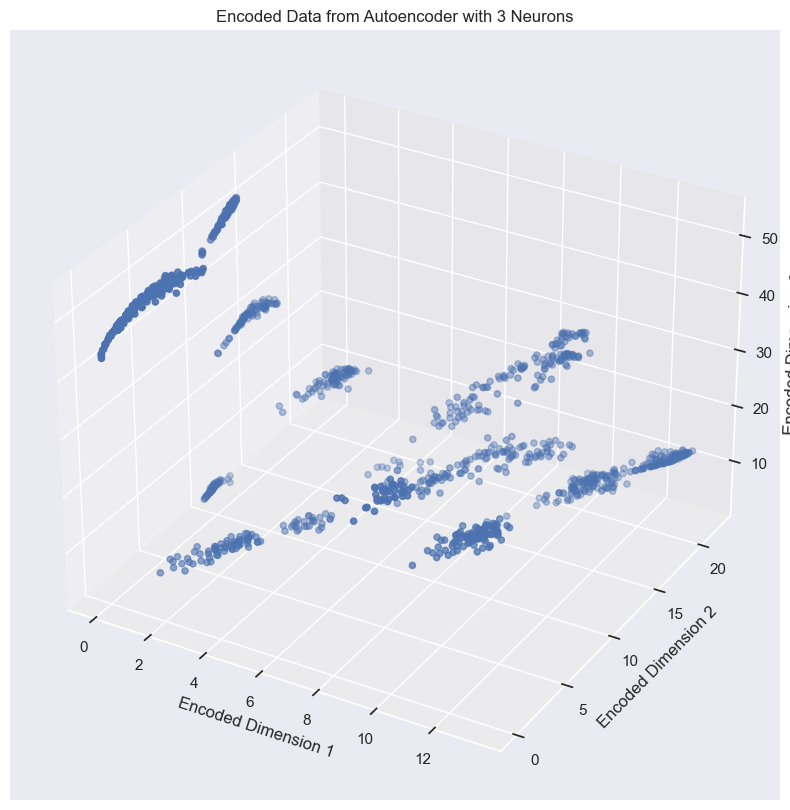

Cover_Type    2
dtype: int64


In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def plot_encoded_data(encoded_data, title): # Function to plot 2D and 3D figures for the encoded data
    if encoded_data.shape[1] == 2:
        plt.figure(figsize=(10, 10))
        plt.scatter(encoded_data[:, 0], encoded_data[:, 1])
        plt.title(title)
        plt.xlabel('Encoded Dimension 1')
        plt.ylabel('Encoded Dimension 2')
        plt.grid(True)
        plt.show()
    elif encoded_data.shape[1] == 3:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(encoded_data[:, 0], encoded_data[:, 1], encoded_data[:, 2])
        ax.set_title(title)
        ax.set_xlabel('Encoded Dimension 1')
        ax.set_ylabel('Encoded Dimension 2')
        ax.set_zlabel('Encoded Dimension 3')
        plt.show()

# Plot encoded data from autoencoder with 2 neurons
plot_encoded_data(encoded_data_2, "Encoded Data from Autoencoder with 2 Neurons")

# Plot encoded data from autoencoder with 3 neurons
plot_encoded_data(encoded_data_3, "Encoded Data from Autoencoder with 3 Neurons")
print(y_test2.nunique())# check unique cover types

### <font color='yellow'> *K-means and EM:*</font> <font color='white'> Now I will use sklearn to implement k-means and EM algorithmns. Since y_test2 only has 2 different cover types, we can adjust our hyperparameters depending on this. Discussing is below code.</font>

In [75]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


def kmeans_clustering(latent_data, true_labels): # This function is for K-means clustering
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=1000) # n_cluster = 2 for 2 different cover types and n_init _ 1000 for random initalization count to get best score between 1000 iterations
    cluster_labels = kmeans.fit_predict(latent_data) # Train K-means
    cluster_labels_adjusted = cluster_labels * 2 + 1 # This is a trick for our cover type. Since model gives output 0 or 1 but we have to make it 1 or 3 for calculating score, we can use label*2+1 equation
    accuracy = accuracy_score(true_labels, cluster_labels_adjusted)
    print("K-means Accuracy:", accuracy)
    print("Adjusted Cluster Labels:", cluster_labels_adjusted)


def em_clustering(latent_data, true_labels):  # This function is for EM clustering
    gmm = GaussianMixture(n_components=2, random_state=4, max_iter=10000)# n_components = 2 for 2 different cover types and max_iter 10000 for not to stuck iteration limit
    cluster_labels = gmm.fit_predict(latent_data) # Train EM
    cluster_labels_adjusted = cluster_labels * 2 + 1 # This is a trick for our cover type. Since model gives output 0 or 1 but we have to make it 1 or 3 for calculating score, we can use label*2+1 equation
    accuracy = accuracy_score(true_labels, cluster_labels_adjusted)
    print("EM Accuracy:", accuracy)
    print("Adjusted Cluster Labels:", cluster_labels_adjusted)


standard_scaler = StandardScaler() # Scaling encoded data before using them
encoded_data_2_scaled = standard_scaler.fit_transform(encoded_data_2)
encoded_data_3_scaled = standard_scaler.fit_transform(encoded_data_3)




print("Clustering with 2 neurons in the latent space:")
kmeans_clustering(encoded_data_2_scaled, y_test2) # Do clustering models using encoded_data_2
em_clustering(encoded_data_2_scaled, y_test2)

print("Clustering with 3 neurons in the latent space:")
kmeans_clustering(encoded_data_3_scaled, y_test2) # Do clustering models using encoded_data_3
em_clustering(encoded_data_3_scaled, y_test2)


Clustering with 2 neurons in the latent space:
K-means Accuracy: 0.5733024691358025
Adjusted Cluster Labels: [1 3 1 ... 1 1 1]
EM Accuracy: 0.5825617283950617
Adjusted Cluster Labels: [1 3 1 ... 1 1 1]
Clustering with 3 neurons in the latent space:
K-means Accuracy: 0.8233024691358025
Adjusted Cluster Labels: [1 1 1 ... 3 1 1]
EM Accuracy: 0.7716049382716049
Adjusted Cluster Labels: [1 1 1 ... 3 1 1]


### <font color='yellow'> *Discussion:*</font> <font color='white'> After clustering the data with EM and K-means, we get good accuracy scores with encoded data. For 2 dimensional encoded data we get 0.57 accuracy for K-means and 0.58 accuracy for EM. For 3 dimensional encoded data we get 0.82 accuracy for K-means and 0.77 accuracy for EM. One importing thing here is as I change the random_state parameters of both EM and K-means, their accuracy change so much. So I find the random_state=42 for K-means and 4 for the EM algorithm works good. Also high value of n_init for K-means is very important for algorithm to prevent it stuck local minimum.</font>

### <font color='yellow'> *Note:*</font> <font color='white'> Sometimes Autoencoding code at C1 gives bad results.(generally when MSE is higher than 0.02, in this situations I suggest re-running that part. The figure of 2 and 3 dimensional data should look like in default sent form. The given accuracies may change when code-rerunned)</font>